# Calibratioon factors saturation

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from IPython.display import HTML
import io
import base64
class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 2px;
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

In [2]:
factors = ['cl3d_c1', 'cl3d_c2', 'cl3d_c3']

# Out of calibration only

In [3]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/calibrated_C1skimC2C3'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_calibrated.hdf5',
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_calibrated.hdf5',
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_tr[name]
store_tr.close()

df = pd.concat([dfTr, dfVal], sort=False)
del dfTr, dfVal

In [4]:
print('\t\t min \t max')
print('cl3d_c1 \t',df['cl3d_c1'].min(), '\t',df['cl3d_c1'].max())
print('cl3d_c2 \t',df['cl3d_c2'].min(), '\t',df['cl3d_c2'].max())
print('cl3d_c3 \t',df['cl3d_c3'].min(), '\t',df['cl3d_c3'].max())

		 min 	 max
cl3d_c1 	 3.8849144 	 26.830284
cl3d_c2 	 0.6058783873702522 	 2.4636831499039866
cl3d_c3 	 0.5121697389227933 	 12.24902645555936


In [5]:
dfQCD = df.query('gentau_decayMode==-2 and cl3d_isbestmatch==True').copy(deep=True)
dfTau = df.query('sgnId==1').copy(deep=True)
dfNu  = df.query('geom_match==False').copy(deep=True)


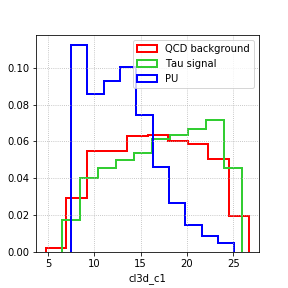
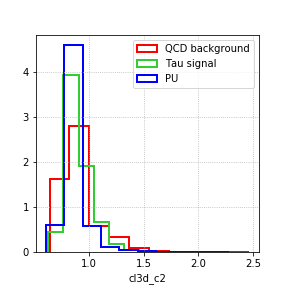
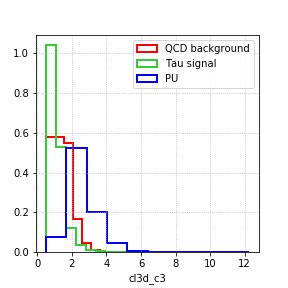

In [6]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(factors)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(dfQCD[factors[i]], label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(dfTau[factors[i]], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    ax.hist(dfNu[factors[i]], label='PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(factors[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

In [ ]:
tot = dfTau.shape[0]
for i in range(len(factors)):
    feat = factors[i]
    for thr in np.linspace(0,30,3000):
        if dfTau.query('{0}<={1}'.format(feat,thr)).shape[0]/tot >= 0.99:
            print(feat, thr)
            break

In [ ]:
tot = dfTau.shape[0]
for i in range(len(factors)):
    feat = factors[i]
    for thr in np.linspace(0,30,3000):
        if dfTau.query('{0}<={1}'.format(feat,thr)).shape[0]/tot >= 0.995:
            print(feat, thr)
            break

In [ ]:
print('QCD passing', dfQCD.query('cl3d_c1<25.1').shape[0]/dfQCD.shape[0])
print('PU passing', dfNu.query('cl3d_c1<25.2').shape[0]/dfNu.shape[0])

In [ ]:
print('QCD passing', dfQCD.query('cl3d_c1<25.1 and cl3d_c2<1.28').shape[0]/dfQCD.shape[0])
print('PU passing', dfNu.query('cl3d_c1<25.2 and cl3d_c2<1.28').shape[0]/dfNu.shape[0])

In [ ]:
print('QCD passing', dfQCD.query('cl3d_c1<25.1 and cl3d_c2<1.28 and cl3d_c3<3.02').shape[0]/dfQCD.shape[0])
print('PU passing', dfNu.query('cl3d_c1<25.1 and cl3d_c2<1.28 and cl3d_c3<3.02').shape[0]/dfNu.shape[0])

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(dfNu['cl3d_pt'],dfNu['cl3d_c1'], alpha=0.01)
plt.scatter(dfTau['cl3d_pt'],dfTau['cl3d_c1'], alpha=0.01)
plt.grid(linestyle=':')
plt.ylabel(r'C1 factor value')
plt.xlabel(r'cluster pT')
plt.yscale("log")
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(dfNu['cl3d_pt'],dfNu['cl3d_c2'], alpha=0.01, label='PU')
plt.scatter(dfTau['cl3d_pt'],dfTau['cl3d_c2'], alpha=0.01, label='Tau')
plt.grid(linestyle=':')
plt.ylabel(r'C2 factor value')
plt.xlabel(r'cluster pT')
plt.yscale("log")
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(dfNu['cl3d_pt'],dfNu['cl3d_c3'], alpha=0.01)
plt.scatter(dfTau['cl3d_pt'],dfTau['cl3d_c3'], alpha=0.01)
plt.grid(linestyle=':')
plt.ylabel(r'C3 factor value')
plt.xlabel(r'cluster pT')
plt.yscale("log")
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(dfNu['cl3d_c1'],dfNu['cl3d_c3'], alpha=0.01)
plt.scatter(dfTau['cl3d_c1'],dfTau['cl3d_c3'], alpha=0.01)
plt.grid(linestyle=':')
plt.ylabel(r'C3 factor value')
plt.xlabel(r'C1 factor value')
plt.yscale("log")
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(dfNu['cl3d_c2'],dfNu['cl3d_c3'], alpha=0.01)
plt.scatter(dfTau['cl3d_c2'],dfTau['cl3d_c3'], alpha=0.01)
plt.grid(linestyle=':')
plt.ylabel(r'C3 factor value')
plt.xlabel(r'C2 factor value')
plt.yscale("log")
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(dfNu['cl3d_c1'],dfNu['cl3d_c2'], alpha=0.01)
plt.scatter(dfTau['cl3d_c1'],dfTau['cl3d_c2'], alpha=0.01)
plt.grid(linestyle=':')
plt.ylabel(r'C2 factor value')
plt.xlabel(r'C1 factor value')
plt.yscale("log")
plt.show()
plt.close()

# Out of the full L1 algo

In [3]:
PUWP = 90

In [4]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolated_skimPUnoPtRscld_skimISORscld90hardPUrej'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_PUWP{0}_isoQCDrejected.hdf5'.format(PUWP),
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_PUWP{0}_isoQCDrejected.hdf5'.format(PUWP),
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_tr[name]
store_tr.close()

df = pd.concat([dfTr, dfVal], sort=False)
del dfTr, dfVal

In [5]:
dfQCD = df.query('gentau_decayMode==-2 and cl3d_isbestmatch==True').copy(deep=True)
dfTau = df.query('sgnId==1').copy(deep=True)
dfNu  = df.query('geom_match==False').copy(deep=True)


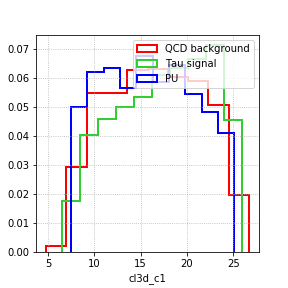
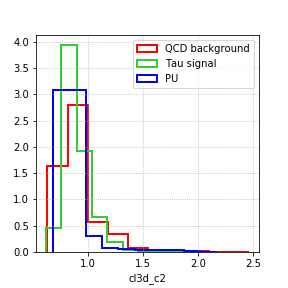
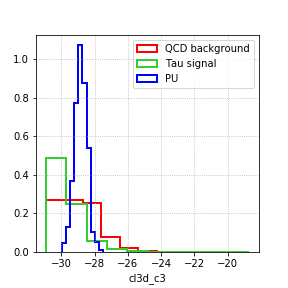

In [6]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(factors)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(dfQCD[factors[i]], label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(dfTau[factors[i]], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    ax.hist(dfNu[factors[i]], label='PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(factors[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

In [ ]:
tot = dfTau.shape[0]
for i in range(len(factors)):
    feat = factors[i]
    for thr in np.linspace(0,30,3000):
        if dfTau.query('{0}<={1}'.format(feat,thr)).shape[0]/tot >= 0.99:
            print(feat, thr)
            break

In [ ]:
tot = dfTau.shape[0]
for i in range(len(factors)):
    feat = factors[i]
    for thr in np.linspace(0,30,3000):
        if dfTau.query('{0}<={1}'.format(feat,thr)).shape[0]/tot >= 0.995:
            print(feat, thr)
            break

In [ ]:
print('QCD passing', dfQCD.query('cl3d_c1<25.0').shape[0]/dfQCD.shape[0])
print('PU passing', dfNu.query('cl3d_c1<25.0').shape[0]/dfNu.shape[0])

In [ ]:
print('QCD passing', dfQCD.query('cl3d_c1<25.1 and cl3d_c2<1.34').shape[0]/dfQCD.shape[0])
print('PU passing', dfNu.query('cl3d_c1<25.2 and cl3d_c2<1.34').shape[0]/dfNu.shape[0])

In [ ]:
print('QCD passing', dfQCD.query('cl3d_c1<25.1 and cl3d_c2<1.28 and cl3d_c3<3.02').shape[0]/dfQCD.shape[0])
print('PU passing', dfNu.query('cl3d_c1<25.1 and cl3d_c2<1.28 and cl3d_c3<3.02').shape[0]/dfNu.shape[0])